In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##Understanding Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

##Now let us find the optimum number of clusters for k-means classification

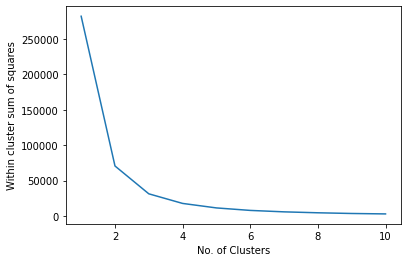

In [ ]:
from sklearn.cluster import KMeans

x = df.iloc[:, [0, 1, 2, 3]].values

# Initialize empty list for sum of squares (within clusters)
sum_sq = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sum_sq.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), sum_sq)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

This is called the elbow method. The elbow occurs at optimum cluster. Hence optimum clusters is 3.

##Now we are creating our K-means Cluster

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_predict = kmeans.fit_predict(x)

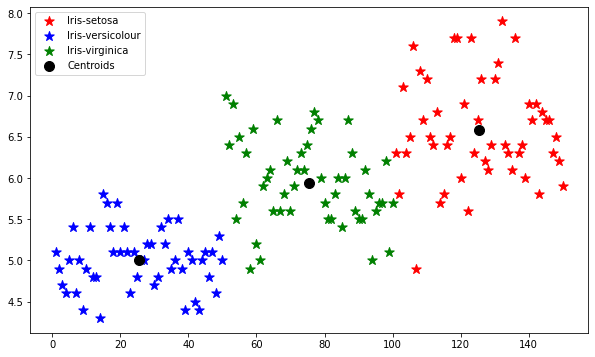

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Iris-setosa', marker='*')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour', marker='*')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Iris-virginica', marker='*')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

# figure(num=None, figsize=(9, 8))
plt.rcParams["figure.figsize"] = (15,8)
plt.legend()
plt.show()

##Plotting 3D graph

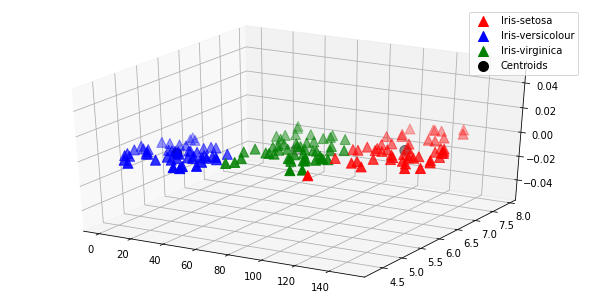

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import random
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Iris-setosa', marker='^')
ax.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour', marker='^')
ax.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Iris-virginica', marker='^')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

# figure(num=None, figsize=(9, 8))
# ax.rcParams["figure.figsize"] = (8,4)
ax.legend()
pyplot.show()